In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline


In [61]:
df = pd.read_csv("dataset/Traffic.csv")  

In [62]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [63]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)

Shape of dataset: (2976, 9)

Columns:
 Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='str')


In [64]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Time               2976 non-null   str  
 1   Date               2976 non-null   int64
 2   Day of the week    2976 non-null   str  
 3   CarCount           2976 non-null   int64
 4   BikeCount          2976 non-null   int64
 5   BusCount           2976 non-null   int64
 6   TruckCount         2976 non-null   int64
 7   Total              2976 non-null   int64
 8   Traffic Situation  2976 non-null   str  
dtypes: int64(6), str(3)
memory usage: 209.4 KB


In [65]:
df.isnull().sum()
# if we have null values we can drop it through this in following line
# df.dropna(inplace=True)

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [66]:
# # Extract hour and minute directly from string (safest method)

# df['Hour'] = df['Time'].str.split(':').str[0].astype(int)
# df['Minute'] = df['Time'].str.split(':').str[1].astype(int)

# # keep date as day number
# df['DayNum'] = df['Date']


# Convert time PROPERLY (handles AM/PM correctly)
df['TimeObj'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')

df['Hour'] = df['TimeObj'].dt.hour
df['Minute'] = df['TimeObj'].dt.minute

# DO NOT TOUCH Date
df['DayNum'] = df['Date']


In [67]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,TimeObj,Hour,Minute,DayNum
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,1900-01-01 00:00:00,0,0,10
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,1900-01-01 00:15:00,0,15,10
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,1900-01-01 00:30:00,0,30,10
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,1900-01-01 00:45:00,0,45,10
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1900-01-01 01:00:00,1,0,10


In [68]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:")
display(df.head())

print("\nStatistical Summary:")
display(df.describe())


Shape: (2976, 13)

Columns:
 Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'TimeObj', 'Hour', 'Minute',
       'DayNum'],
      dtype='str')

First 5 rows:


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,TimeObj,Hour,Minute,DayNum
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,1900-01-01 00:00:00,0,0,10
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,1900-01-01 00:15:00,0,15,10
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,1900-01-01 00:30:00,0,30,10
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,1900-01-01 00:45:00,0,45,10
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1900-01-01 01:00:00,1,0,10



Statistical Summary:


,Date,CarCount,BikeCount,BusCount,TruckCount,Total,TimeObj,Hour,Minute,DayNum
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976,2976.00000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414,1900-01-01 11:52:30,11.50000,22.500000,16.000000
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,1900-01-01 00:00:00,0.00000,0.000000,1.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1900-01-01 05:56:15,5.75000,11.250000,8.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000,1900-01-01 11:52:30,11.50000,22.500000,16.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000,1900-01-01 17:48:45,17.25000,33.750000,24.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000,1900-01-01 23:45:00,23.00000,45.000000,31.000000
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627,NaN,6.92335,16.773328,8.945775


### Plots

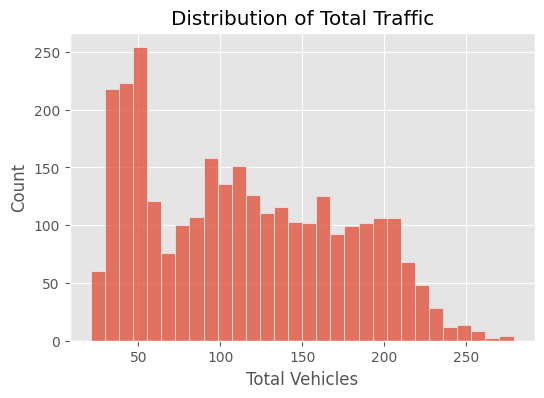

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['Total'], bins=30)
plt.title("Distribution of Total Traffic")
plt.xlabel("Total Vehicles")
plt.show()


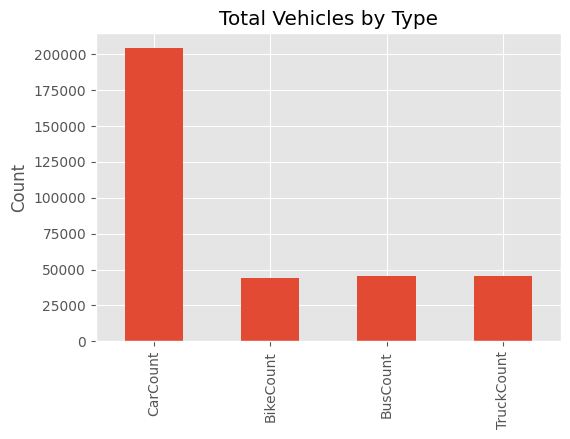

In [70]:
vehicle_cols = ['CarCount','BikeCount','BusCount','TruckCount']

df[vehicle_cols].sum().plot(kind='bar', figsize=(6,4))
plt.title("Total Vehicles by Type")
plt.ylabel("Count")
plt.show()


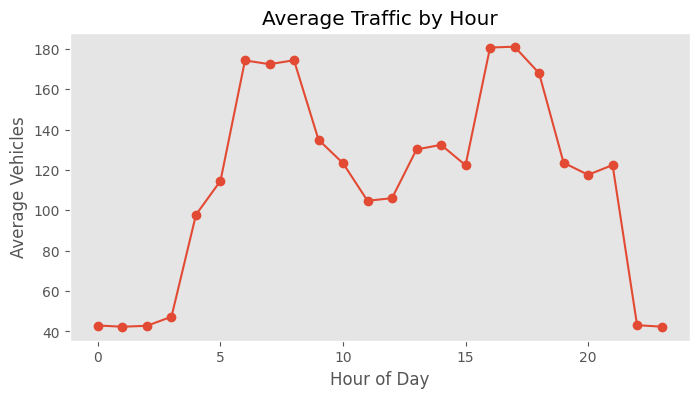

In [71]:
hourly = df.groupby('Hour')['Total'].mean()

plt.figure(figsize=(8,4))
hourly.plot(marker='o')
plt.title("Average Traffic by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Vehicles")
plt.grid()
plt.show()


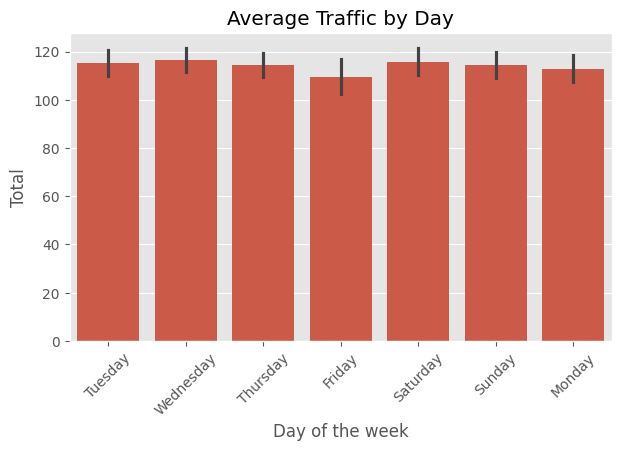

In [72]:
plt.figure(figsize=(7,4))
sns.barplot(x='Day of the week', y='Total', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Traffic by Day")
plt.show()


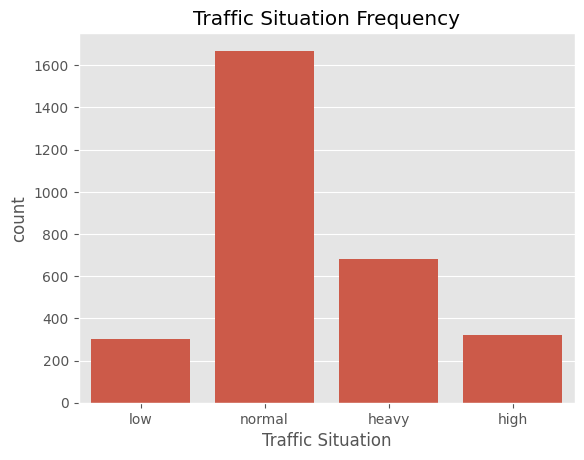

In [73]:
sns.countplot(x='Traffic Situation', data=df)
plt.title("Traffic Situation Frequency")
plt.show()


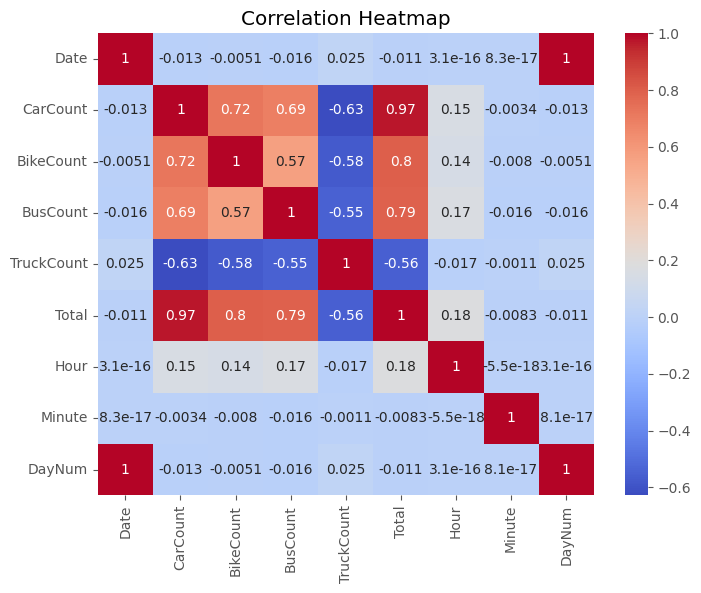

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
